# K-Means Clustering
K-means clustering is an unsupervised clustering algorithm that takes as input a number of clusters and a max number of iterations. It then clusters data by, at first, randomly initialising clusters


In [19]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.datasets import make_blobs 
%matplotlib inline

seed = 2
np.random.seed(seed)

### Choose a dataset

In [21]:
dataset = 'blobs'
if dataset == 'blobs':
    data, y = make_blobs(centers=3, n_samples=1000, n_features=2, shuffle=True, random_state=seed)

This implementation is following [this](https://www.youtube.com/watch?v=vtuH4VRq1AU) tutorial. 

In [22]:
def euclidean_distance(x1, x2): 
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans: 
    def __init__(self, k=3, max_iters=100, plot_steps=False):
        self.k = k
        self.max_iters = max_iters 
        self.plot_steps = plot_steps 

        self.clusters = [[] for _ in range(self.k)] # List of sample indices, with an empty list for each cluster to begin with
        self.centroids = [] # Will store the mean feature vector for each cluster

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialise our centroids 
        random_sample_idxs = np.random.choice(self.n_samples, self.k, replace=False) # Returns an array of length k with a random number between 0-n_samples
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimise 
        for _ in range(self.max_iters):
            # Update clusters 
            self.clusters = self.create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()

            # Update centroids
            centroids_old = self.centroids # Store old centroids to check for convergence
            self.centroids = self.get_centroids(self.clusters)
            if self.plot_steps:
                self.plot()

            # Check for convergence
            if self.is_converged(centroids_old, self.centroids):
                break 

        # Return cluster labels 
        return self.get_cluster_labels(self.clusters)

    def create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def closest_centroid(self, sample, centroids): 
        ''' Calculate distances between current sample to each centroid. 
            Return index of nearest centroid. '''
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def get_centroids(self, clusters):
        ''' Will find mean value of each cluster '''
        centroids = np.zeros((self.k, self.n_features)) # For each cluster we will store the feature vector
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean 
        return centroids

    def is_converged(self, centroids_old, centroids):
        ''' Will calculate the distance between old and new centroids 
            and return whether it is 0 or not '''
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def get_cluster_labels(self, clusters): 
        ''' Returns the index of the cluster a sample was assigned to '''
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx 
        return labels

    def plot(self):
        ''' Plots the data, which cluster it belongs to and the centroids '''
        fig, ax = plt.subplots(figsize=(12,8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T 
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker='x', color='black', linewidth=2)

        plt.show()


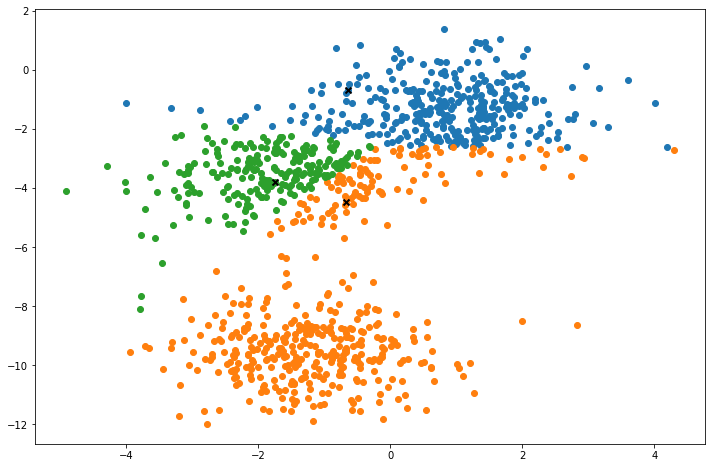

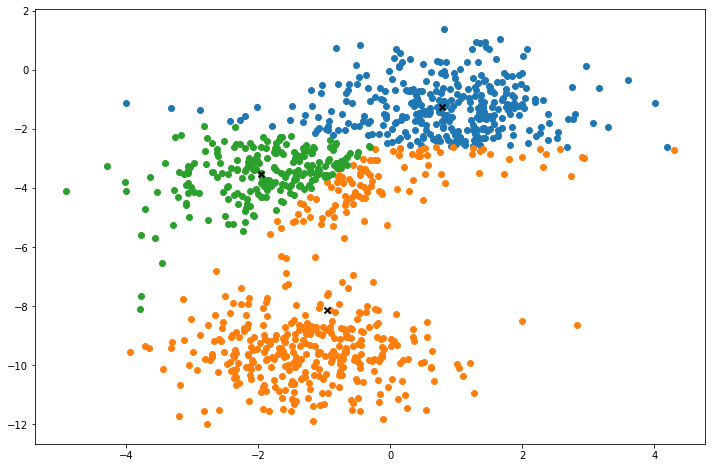

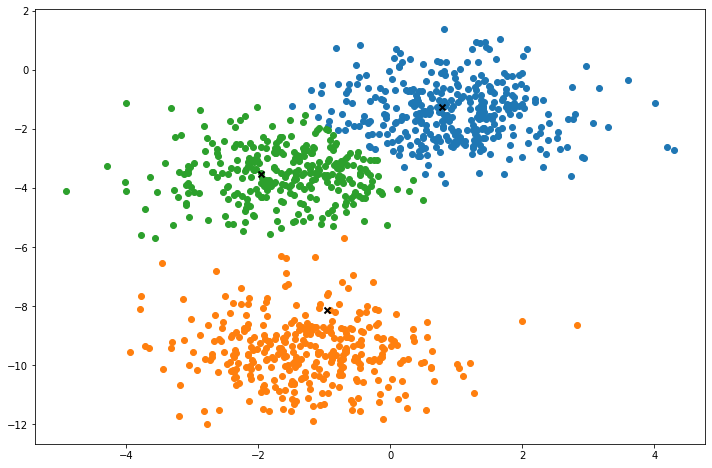

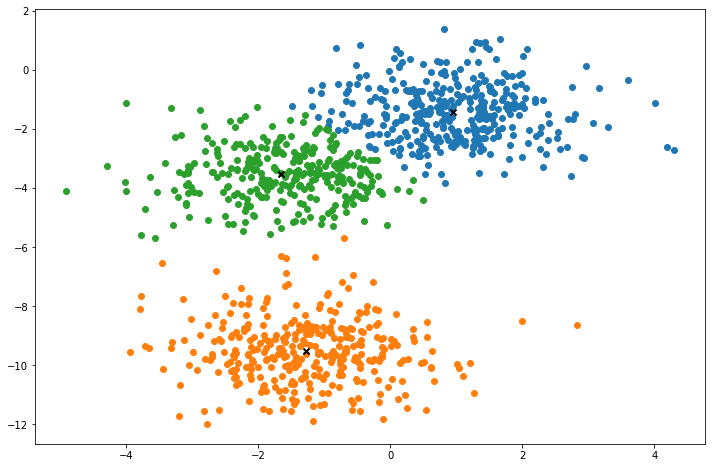

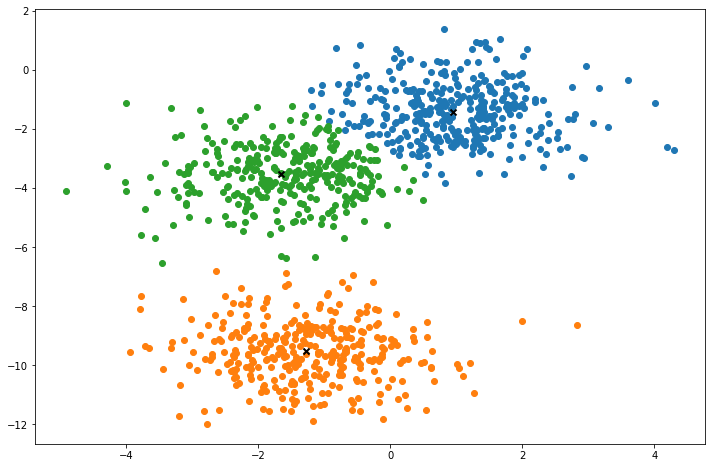

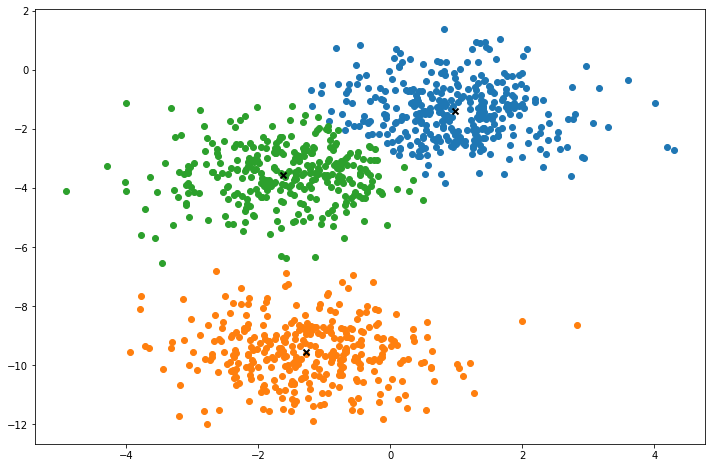

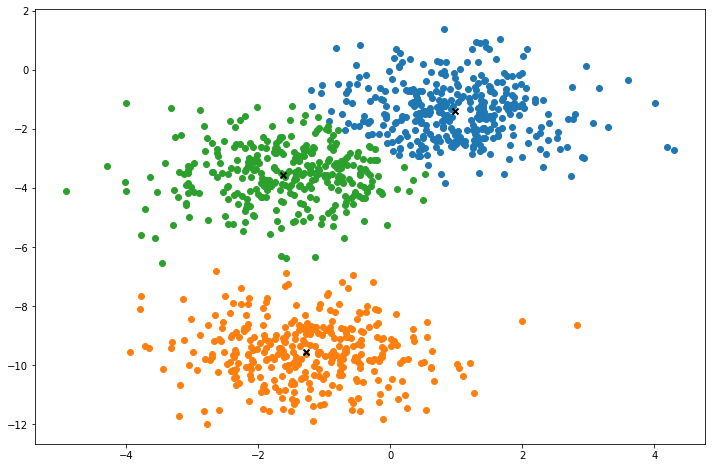

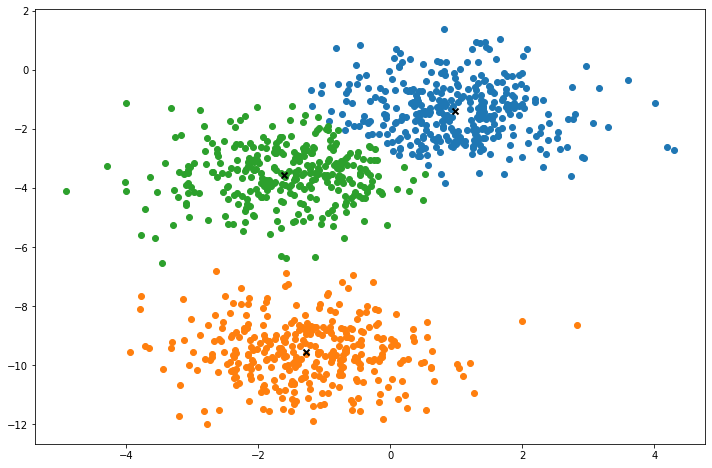

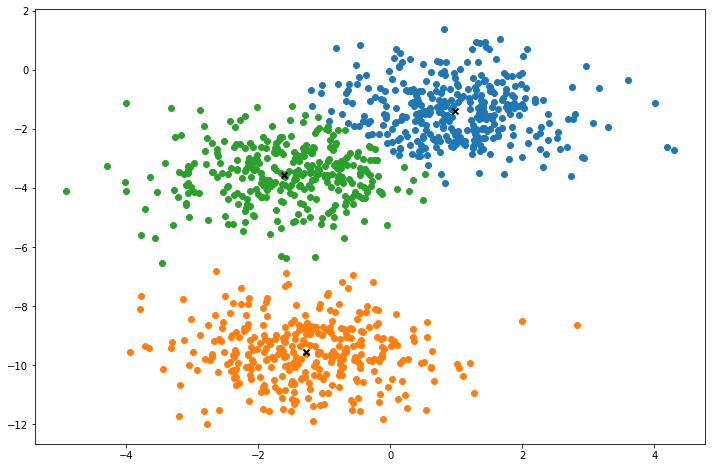

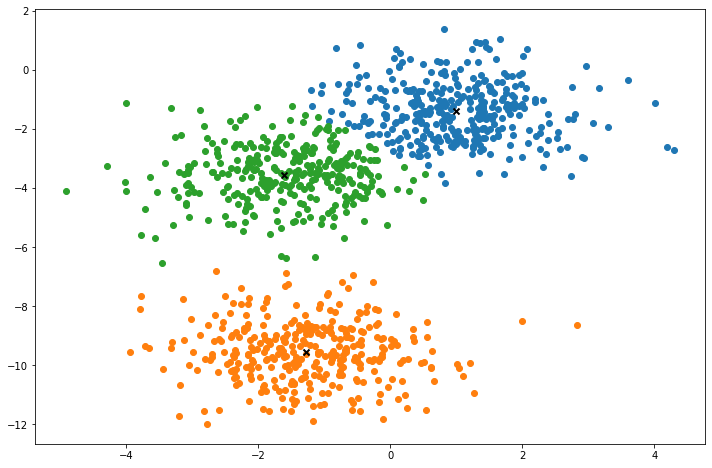

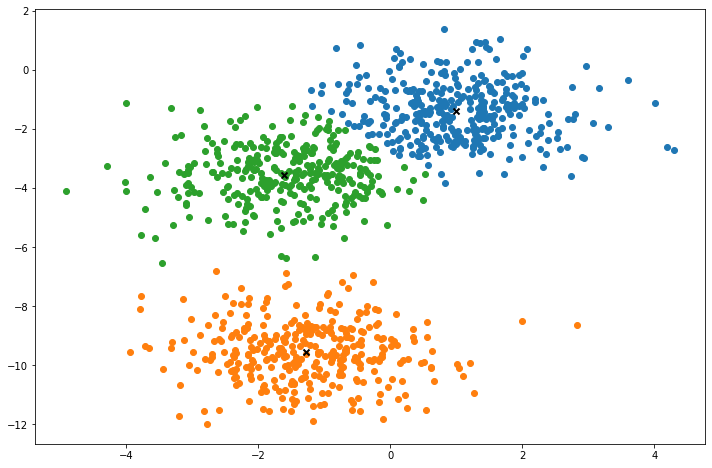

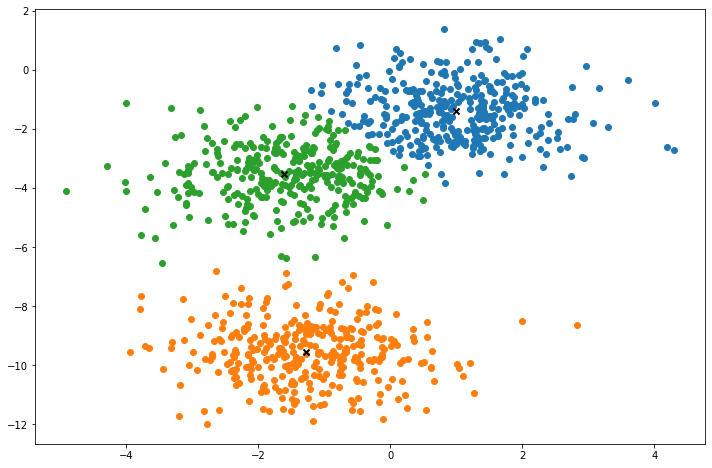

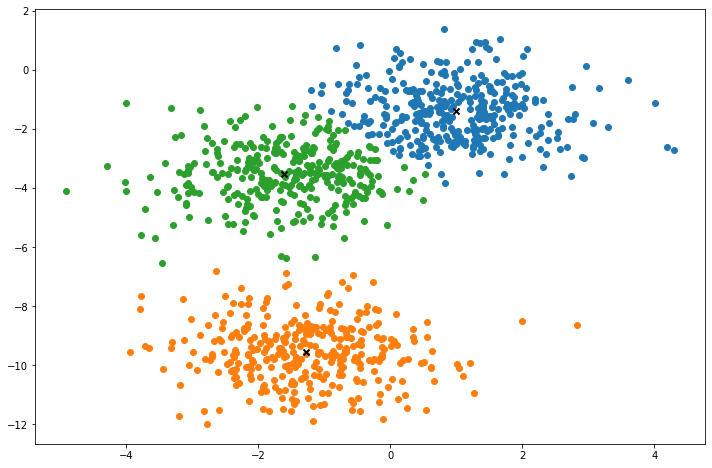

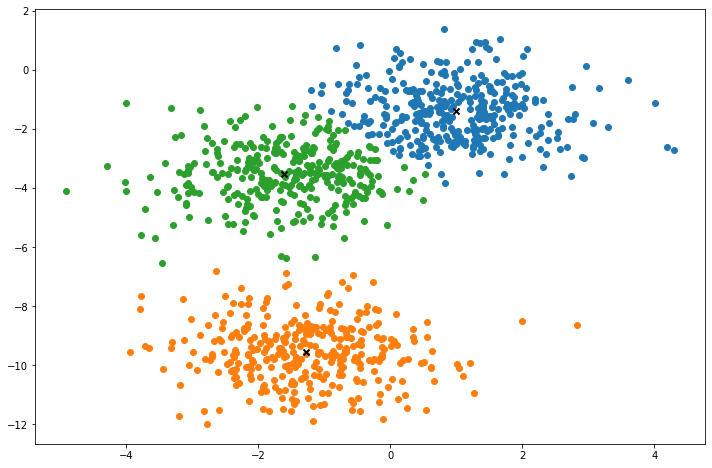

In [23]:
k = 3
KMC = KMeans(k=k, max_iters=100, plot_steps=True)
y_pred = KMC.predict(data)